In [1]:
#!pip install wordcloud
import json
import pandas as pd 
import matplotlib.pyplot as plt 
from pprint import pprint # pretty print
from tqdm import tqdm # google this
from wordcloud import WordCloud
import itertools
from collections import Counter
import collections
import csv
import numpy as np
from scipy import stats

In [2]:
#seattle = []
#with open("listings.csv","r") as fp:
    #for line in tqdm(fp):
        #try:
            #seattle.append(csv.loads(line))
        #except:
            #pass
#df = pd.DataFrame.from_dict(seattle)
#pprint(seattle)


In [3]:
listings_df = pd.read_csv('listings.csv')
listings_df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20210318170758,2021-04-01,Casa Madrona - Urban Oasis 1 block from the park!,Now booking 30 night Minimum only. Please cont...,Madrona is a hidden gem of a neighborhood. It ...,https://a0.muscache.com/pictures/02973ad3-a7a3...,2536,https://www.airbnb.com/users/show/2536,...,10.0,10.0,10.0,STR-OPLI-19-002837,f,2,2,0,0,0.21
1,9419,https://www.airbnb.com/rooms/9419,20210318170758,2021-03-19,Glorious sun room w/ memory foambed,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,...,10.0,10.0,10.0,STR-OPLI-19-003039,f,7,0,7,0,1.14
2,9531,https://www.airbnb.com/rooms/9531,20210318170758,2021-03-20,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,https://www.airbnb.com/users/show/31481,...,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.37
3,9534,https://www.airbnb.com/rooms/9534,20210318170758,2021-03-19,The Coolest Tangerine Dream MIL!,Welcome to my delicious Tangerine Dream! A co...,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,https://www.airbnb.com/users/show/31481,...,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.50
4,9596,https://www.airbnb.com/rooms/9596,20210318170758,2021-03-20,"the down home , spacious, central and fab!","We are in a great neighborhood, quiet, full of...","if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,https://www.airbnb.com/users/show/14942,...,9.0,10.0,9.0,STR-OPLI-19-002622,f,2,2,0,0,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,48715255,https://www.airbnb.com/rooms/48715255,20210318170758,2021-03-19,Spacious 2BD apartment with self-checkin,Experience a home away from home in these mode...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,8534462,https://www.airbnb.com/users/show/8534462,...,NaN,NaN,NaN,STR-OPLI-19-003325,t,140,140,0,0,NaN
4209,48715257,https://www.airbnb.com/rooms/48715257,20210318170758,2021-03-20,"Amazing 2BD Seattle apartment, fast wifi, self...",Experience a home away from home in these mode...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,8534462,https://www.airbnb.com/users/show/8534462,...,NaN,NaN,NaN,STR-OPLI-19-003325,t,140,140,0,0,NaN
4210,48718112,https://www.airbnb.com/rooms/48718112,20210318170758,2021-03-19,Seattle Water View Home with Hot Tub: Trendy B...,We want you to know we are doing our part to e...,Ballard,https://a0.muscache.com/pictures/60391490-0a5c...,8009691,https://www.airbnb.com/users/show/8009691,...,NaN,NaN,NaN,STR-OPLI-19-001991,f,5,5,0,0,NaN
4211,48718428,https://www.airbnb.com/rooms/48718428,20210318170758,2021-03-19,**WOW** Stylish Ballard True 1BR Apt - Pets ok!,Focused exclusively on 30 day+ stays to meet t...,Located right near Market Street and 15th at t...,https://a0.muscache.com/pictures/d9c8ad96-c7af...,218805459,https://www.airbnb.com/users/show/218805459,...,NaN,NaN,NaN,NaN,t,60,60,0,0,NaN


In [19]:
names = listings_df['name']
description = listings_df['description']
nbhood_oview = listings_df['neighborhood_overview']
instant_book = listings_df['instant_bookable']
lstgs_per_host = listings_df['host_total_listings_count']
host_name = listings_df['host_name']
resp_time = listings_df['host_response_time']
accep_rate = listings_df['host_acceptance_rate']
avail_365 = listings_df['availability_365']
resp_rate = listings_df['host_response_rate']
superhost = listings_df['host_is_superhost']
pro_pic = listings_df['host_has_profile_pic']
nbhood = listings_df['neighbourhood_group_cleansed']
prop_type = listings_df['property_type']
room_type = listings_df['room_type']
num_accom = listings_df['accommodates']
baths = listings_df['bathrooms_text']
bedrooms = listings_df['bedrooms']
beds = listings_df['beds']
amenities = listings_df['amenities']
price = listings_df['price']
min_nights = listings_df['minimum_nights']
num_reviews = listings_df['number_of_reviews']
rev_scores = listings_df['review_scores_rating']
rev_clean = listings_df['review_scores_cleanliness'] 
#rev_per_month = pd.concat(listings_df['reviews_per_month'], listings_df['id'], axis = 0)

In [63]:
entire_home_num_reviews = num_reviews.loc[listings_df['room_type'] == 'Entire home/apt']
private_room_num_reviews = num_reviews.loc[listings_df['room_type'] == 'Private room']
entire_home_num_reviews.mean()
private_room_num_reviews.mean()


57.24038461538461

In [67]:
resp_rate = resp_rate.replace('[\%,]', '', regex=True).astype(float)
resp_rate.dropna(inplace = True)
entire_home_resp_rate = resp_rate.loc[listings_df['room_type'] == 'Entire home/apt']
private_room_resp_rate = resp_rate.loc[listings_df['room_type'] == 'Private room']
entire_home_resp_rate.mean()
private_room_resp_rate.mean()

93.937106918239

In [66]:
entire_home_resp_rate.mean()

95.2009585758302

In [43]:
entire_home_nbhood = nbhood.loc[listings_df['room_type'] == 'Entire home/apt']
private_room_nbhood = nbhood.loc[listings_df['room_type'] == 'Private room']
entire_home_nbhood.value_counts()
private_room_nbhood.value_counts(normalize = True)

Other neighborhoods    0.229396
Rainier Valley         0.094780
Capitol Hill           0.092033
Central Area           0.090659
Beacon Hill            0.079670
Delridge               0.056319
Northgate              0.056319
Queen Anne             0.045330
University District    0.043956
Ballard                0.039835
West Seattle           0.039835
Downtown               0.035714
Cascade                0.032967
Lake City              0.027473
Magnolia               0.019231
Seward Park            0.013736
Interbay               0.002747
Name: neighbourhood_group_cleansed, dtype: float64

In [44]:
entire_home_nbhood.value_counts(normalize = True)

Downtown               0.193869
Other neighborhoods    0.175474
Capitol Hill           0.094307
Central Area           0.076496
Queen Anne             0.074453
West Seattle           0.071241
Ballard                0.054599
Cascade                0.049051
Rainier Valley         0.042920
Beacon Hill            0.039708
University District    0.031825
Delridge               0.022774
Magnolia               0.019562
Northgate              0.018686
Lake City              0.015182
Interbay               0.011387
Seward Park            0.008467
Name: neighbourhood_group_cleansed, dtype: float64

In [20]:
rev_clean.dropna(inplace = True)
rev_clean
rev_scores.dropna(inplace = True)
entire_home_rev_scores = rev_scores.loc[listings_df['room_type'] == 'Entire home/apt']
private_room_rev_scores = rev_scores.loc[listings_df['room_type'] == 'Private room']
entire_home_rev_scores.mean()
private_room_rev_scores.mean()

94.0672

In [25]:
entire_home_avail_365 = avail_365.loc[listings_df['room_type'] == 'Entire home/apt']
private_room_avail_365 = avail_365.loc[listings_df['room_type'] == 'Private room']
entire_home_avail_365.mean()

166.33430656934306

In [26]:
private_room_avail_365.mean()

180.3021978021978

In [6]:
price = price.replace('[\$,]', '', regex=True).astype(float)
entire_homes = room_type[room_type == 'Entire home/apt']
entire_home_clean_rev = rev_clean.loc[listings_df['room_type'] == 'Entire home/apt']
entire_home_price = price.loc[listings_df['room_type'] == 'Entire home/apt']
entire_home_clean_rev.mean()
entire_homes.count()
entire_home_clean_rev.count()
entire_homes.count()

3425

In [7]:
entire_home_price.mean()

148.61459854014598

In [9]:
private_rooms = room_type[room_type == 'Private room']
private_room_clean_rev = rev_clean.loc[listings_df['room_type'] == 'Private room']
private_room_price = price.loc[listings_df['room_type'] == 'Private room']
private_room_clean_rev.mean()  
private_rooms.count() 
private_room_clean_rev.count() 

622

In [10]:
private_room_price.mean()

73.58928571428571

#### hypothesis testing

In [11]:
homes = entire_homes.count()
clean_a = entire_home_clean_rev.sum()
failures_a = entire_homes.count() - entire_home_clean_rev.count()

rooms = private_rooms.count()
clean_b = private_room_clean_rev.sum() 
failures_b = private_rooms.count() - private_room_clean_rev.count() 

beta_a = stats.beta(1+clean_a, 1+failures_a)
beta_b = stats.beta(1+clean_b, 1+failures_b)

samp_a = beta_a.rvs(size=100000)
samp_b = beta_b.rvs(size=100000)

(samp_b > samp_a).mean()

0.99134

####

In [41]:
entire_home_nbhood.plot.scatter(entire_home_nbhood, entire_home_nbhood.value_counts())

ValueError: plot kind scatter can only be used for data frames

In [27]:
#house = pd.merge(listings_df['beds'], listings_df['bedrooms'],on = listings_df[])
house
rev_per_month

0       0.21
1       1.14
2       0.37
3       0.50
4       0.82
        ... 
4208     NaN
4209     NaN
4210     NaN
4211     NaN
4212     NaN
Name: reviews_per_month, Length: 4213, dtype: float64

In [63]:
room_type.value_counts()

Entire home/apt    3425
Private room        728
Shared room          46
Hotel room           14
Name: room_type, dtype: int64

In [62]:
room_type.value_counts(normalize=True)

Entire home/apt    0.812960
Private room       0.172798
Shared room        0.010919
Hotel room         0.003323
Name: room_type, dtype: float64

In [9]:
nbhood.value_counts()
prop_type.value_counts()
num_accom.value_counts()
num_accom.value_counts(normalize=True)
baths.value_counts()
bedrooms.value_counts()
beds.value_counts()
baths.value_counts()

1 bath               2650
2 baths               430
1 private bath        254
1 shared bath         237
1.5 baths             151
2.5 baths             149
2 shared baths         76
3 baths                68
3.5 baths              66
1.5 shared baths       46
3 shared baths         33
0 shared baths         14
4 baths                 7
2.5 shared baths        4
Half-bath               4
3.5 shared baths        3
5 shared baths          3
16 shared baths         3
Shared half-bath        2
4 shared baths          2
4.5 baths               2
Private half-bath       2
0 baths                 1
6 baths                 1
Name: bathrooms_text, dtype: int64

In [32]:
names

0       Casa Madrona - Urban Oasis 1 block from the park!
1                     Glorious sun room w/ memory foambed
2                     The Adorable Sweet Orange Craftsman
3                        The Coolest Tangerine Dream MIL!
4              the down home , spacious, central and fab!
                              ...                        
4208             Spacious 2BD apartment with self-checkin
4209    Amazing 2BD Seattle apartment, fast wifi, self...
4210    Seattle Water View Home with Hot Tub: Trendy B...
4211      **WOW** Stylish Ballard True 1BR Apt - Pets ok!
4212            Capitol Hill Studio, w/ W/D by Blueground
Name: name, Length: 4213, dtype: object

In [43]:
host_name.value_counts()

Barsala           140
Kia                96
Melissa            94
Blueground         93
Eric               79
                 ... 
Blake & Lauren      1
Cyndy               1
Ashly               1
Jim                 1
Siri                1
Name: host_name, Length: 1330, dtype: int64

#listings per host don't match occurances of host name because hosts might have properties in other cities

In [44]:
description[0]

"Now booking 30 night Minimum only. Please contact for seasonal discounts. <br /><br />Gorgeous, architect remodeled, Dutch Colonial in the heart of Madrona. 4 Bedroom, 2.5 bath, Chef's Kitchen, gracious living and dining room, enclosed back garden, deck, grill, fruit trees. <br /><br />2 blocks to bus. <br />3 mins to Cap Hill. <br />5 Mins to downtown<br />5 mins to Amazon, Google, South Lake Union. <br />Within 5-10 minutes of 5 of the areas largest hospitals.<br />Extra storage space in basement for families that are remodeling/moving<br /><br /><b>The space</b><br />This beautiful, gracious home has been completely restored from the studs up, adding period touches such as window benches and floor to ceiling bookshelves. The house is perfect for family gatherings, large or small, groups of friends, or colleagues.<br /><br />Upstairs are 4 bedrooms and two full baths with Olympic mountain and city skyline views. The main floor features a formal entry leading to a sun-lit living room

In [34]:
nbhood_oview

0       Madrona is a hidden gem of a neighborhood. It ...
1       Lots of restaurants (see our guide book) bars,...
2       The neighborhood is awesome!  Just far enough ...
3       The neighborhood is the best of two worlds...w...
4       if you arrive early for check in at 3,  I reco...
                              ...                        
4208                                                  NaN
4209                                                  NaN
4210                                              Ballard
4211    Located right near Market Street and 15th at t...
4212    This furnished apartment is situated in Capito...
Name: neighborhood_overview, Length: 4213, dtype: object

In [45]:
instant_book
instant_book.value_counts(normalize=True)

f    0.513174
t    0.486826
Name: instant_bookable, dtype: float64

In [48]:
lstgs_per_host
lstgs_per_host.value_counts()

1.0       1242
2.0        519
0.0        438
3.0        281
882.0      140
4.0        132
10.0       103
1225.0      96
6.0         96
1435.0      93
5.0         91
1318.0      75
68.0        75
8.0         69
7.0         64
9.0         56
17.0        51
64.0        44
24.0        42
13.0        32
11.0        29
27.0        28
40.0        27
14.0        22
15.0        19
31.0        17
12.0        16
131.0       14
16.0        13
20.0        12
77.0        12
18.0        11
22.0        10
342.0        9
458.0        8
206.0        7
46.0         7
475.0        6
94.0         3
58.0         2
28.0         2
135.0        2
496.0        1
49.0         1
128.0        1
264.0        1
51.0         1
144.0        1
Name: host_total_listings_count, dtype: int64

In [ ]:
value_counts(normalize=True)

In [50]:
rev_scores.value_counts()

100.0    781
99.0     496
98.0     471
97.0     377
96.0     300
95.0     209
93.0     146
94.0     135
92.0     102
90.0      68
80.0      64
91.0      61
88.0      39
87.0      35
89.0      34
60.0      27
85.0      21
86.0      20
84.0      14
83.0      13
82.0      11
20.0      11
75.0       7
81.0       6
70.0       5
50.0       4
30.0       3
40.0       3
78.0       3
67.0       3
73.0       3
77.0       2
72.0       2
57.0       1
63.0       1
55.0       1
79.0       1
51.0       1
76.0       1
Name: review_scores_rating, dtype: int64

<AxesSubplot:>

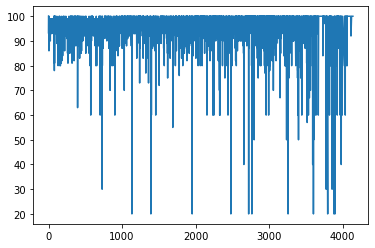

In [45]:
rev_scores.plot()

In [7]:
neighbourhoods_df = pd.read_csv('neighbourhoods.csv')
neighbourhoods_df

,neighbourhood_group,neighbourhood
0,Ballard,Adams
1,Ballard,Loyal Heights
2,Ballard,Sunset Hill
3,Ballard,West Woodland
4,Ballard,Whittier Heights
...,...,...
85,West Seattle,Fauntleroy
86,West Seattle,Gatewood
87,West Seattle,Genesee
88,West Seattle,North Admiral


In [8]:
reviews_df = pd.read_csv('reviews.csv')
reviews_df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...
...,...,...,...,...,...,...
262464,48382242,736787217,2021-03-06,215409003,Kelvin,“They weren’t kidding when it says Pike Place ...
262465,48382242,737302569,2021-03-07,62957433,Evan,This is such a steal of a deal it’s not even f...
262466,48382242,738367090,2021-03-12,164562404,Sarah,One of the best parts about staying here was t...
262467,48382242,739244211,2021-03-14,187191376,Arianne,Amazing place for a Seattle trip. We fell in l...


In [36]:
#finding p value for hypothesis testing
#p = stats.ttest_ind(price, rev_scores, equal_var=True)[1]
#p

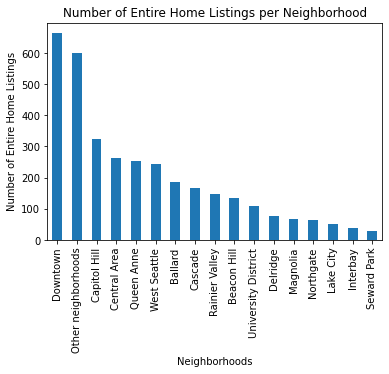

In [60]:
fig, ax = plt.subplots()
entire_home_nbhood_grouped = entire_home_nbhood.value_counts()
entire_home_nbhood_grouped.plot.bar()
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Number of Entire Home Listings')
ax.set_title('Number of Entire Home Listings per Neighborhood')
plt.savefig('Entire Home Neighborhoods')

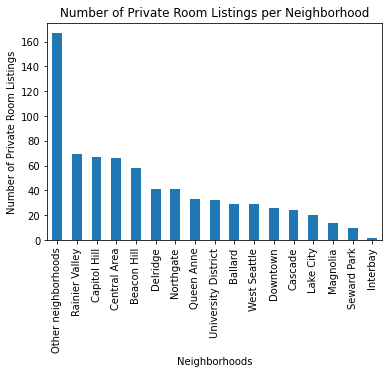

In [61]:
fig, ax = plt.subplots()
private_room_nbhood_grouped = private_room_nbhood.value_counts()
private_room_nbhood_grouped.plot.bar()
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Number of Private Room Listings')
ax.set_title('Number of Private Room Listings per Neighborhood')
plt.savefig('Private Room Neighborhoods')

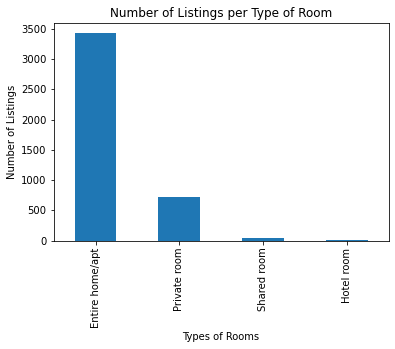

In [58]:
fig, ax = plt.subplots()
room_type_grouped = room_type.value_counts()
room_type_grouped.plot.bar()
ax.set_xlabel('Types of Rooms')
ax.set_ylabel('Number of Listings')
ax.set_title('Number of Listings per Type of Room')
plt.savefig('Room Types')

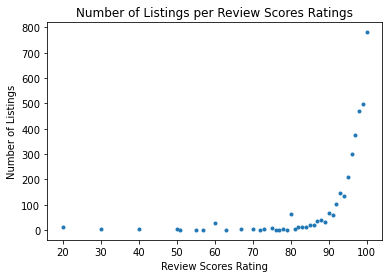

In [59]:
fig, ax = plt.subplots()
rev_scores_grouped = rev_scores.value_counts()
rev_scores_grouped.plot(x='Review Scores Rating', y = 'Number of Listings', style='.')
ax.set_xlabel('Review Scores Rating')
ax.set_ylabel('Number of Listings')
ax.set_title('Number of Listings per Review Scores Ratings')
plt.savefig('Number of Listings per Review Scores Ratings')

In [ ]:
instant_book 
lstgs_per_host 
accep_rate = 
resp_rate = 
superhost 
pro_pic
nbhood 
prop_type 
num_accom 
baths = listings_df['bathrooms_text']
bedrooms = listings_df['bedrooms']
beds = listings_df['beds']
amenities = listings_df['amenities']
price = listings_df['price']
min_nights = listings_df['minimum_nights']
num_reviews = listings_df['number_of_reviews']
rev_scores = listings_df['review_scores_rating']
rev_per_month

<AxesSubplot:>

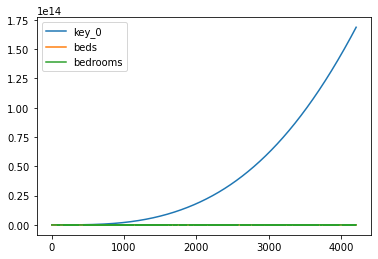

In [22]:
plt.figure
house.plot()